In [1]:
from Preprocess.Data_load import DataLoad
from Preprocess.Preprocess import text_preprocess, get_processing_df

from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

2023-06-29 11:05:44.567457: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-29 11:05:44.659394: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 11:05:45.542597: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 데이터 전처리

In [2]:
dl = DataLoad(tran_path='./Data/transcripts.csv', meta_path='./Data/videos.csv')
transcript = dl.load_transcripts()
meta = dl.load_meta()

In [8]:
pop_id, unpop_id = DataLoad.get_id(meta,ratio=0.4)

In [4]:
pop_df = DataLoad.get_df(transcript=transcript,movie_id=pop_id)
pop_script =DataLoad.get_script(pop_df)

In [5]:
unpop_df = DataLoad.get_df(transcript=transcript,movie_id=unpop_id)
unpop_script = DataLoad.get_script(unpop_df)

In [ ]:
for id in pop_script.keys() : 
    pop_script[id] = text_preprocess(pop_script[id])
for id in unpop_script.keys() : 
    unpop_script[id] = text_preprocess(unpop_script[id])

In [ ]:
pop_processing_df = get_processing_df(pop_script)
unpop_processing_df = get_processing_df(unpop_script)

# 모델 

In [2]:
model = AutoModelForSequenceClassification.from_pretrained("j5ng/kcbert-formal-classifier")
tokenizer = AutoTokenizer.from_pretrained('j5ng/kcbert-formal-classifier')

formal_classifier = pipeline(task="text-classification", model=model, tokenizer=tokenizer)

KeyboardInterrupt: 

In [ ]:
pop_processing_df['Formal'] = pop_processing_df['script'].apply(lambda x : int(formal_classifier(x)[0]['label'][-1]))
unpop_processing_df['Formal'] = unpop_processing_df['script'].apply(lambda x : int(formal_classifier(x)[0]['label'][-1]))

In [3]:
pop_processing_df = pd.read_csv('./Data/pop_processing_Formal.csv', index_col=0)
unpop_processing_df = pd.read_csv('./Data/unpop_processing_Formal.csv', index_col=0)

In [4]:
pop_processing_df

,id,script,Formal
0,2YiZrIJzUsk,예 오수학의 다 합창에 곱을 이용한 인수분해 파트 투입니다,1
1,2YiZrIJzUsk,자 여러분들께서 아마 시중에 문제집들을 보시면요,1
2,2YiZrIJzUsk,이인 수분해를 쪽 공부할 거야,0
3,2YiZrIJzUsk,그래서 여러분들이 문제집에서 인수분의 마 풀고 공부했어요,1
4,2YiZrIJzUsk,그리고 나면 뒤쪽에 문제들이 몇 페이지가 나오고 뭐 단원 종합문제라던가 이런 이름이...,1
...,...,...,...
4491,yjSgBIT6dbk,이런문제가나오면아은까지는곱한심히줘힘을거다내면은그대로부분을인물뭐이렇게함께하라그래서이것...,0
4492,yjSgBIT6dbk,그래도 악마라고 했죠,1
4493,yjSgBIT6dbk,왜 록맨 양음 그리고 조금 복잡하면 음식을 적용할 수가 요령을 적용할 수가 없게 돼,0
4494,yjSgBIT6dbk,그래서 꽤 뜯어내는 쉽게 할 수 있고 의무 안되는 난 기회를 항상 이야기란 아시겠죠,1


In [5]:
pop_form_ratio = pop_processing_df.groupby('id')['Formal'].mean()
unpop_form_ratio = unpop_processing_df.groupby('id')['Formal'].mean()

In [6]:
pop_form_ratio.mean() , unpop_form_ratio.mean()

(0.72189915523951, 0.7322791514017118)

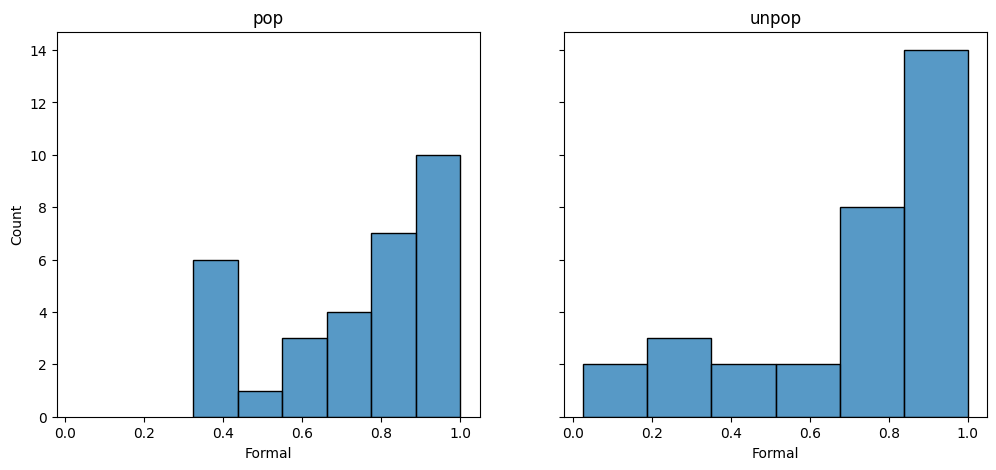

In [20]:
fig, ax = plt.subplots(1,2, sharex=True,sharey=True , figsize=(12,5)) 
bar_width = 0.1 
sns.histplot(pop_form_ratio, ax=ax[0])
ax[0].set_title('pop')
sns.histplot(unpop_form_ratio, ax=ax[1])
ax[1].set_title('unpop')
plt.show()

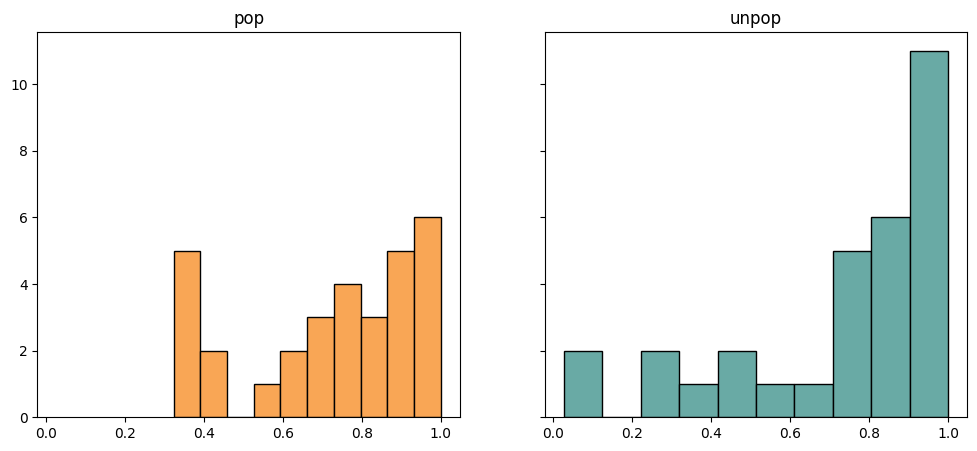

In [44]:
fig, ax = plt.subplots(1,2, sharex=True,sharey=True , figsize=(12,5)) 
bar_width = 0.1 
ax[0].hist(pop_form_ratio, color = '#F9A655',edgecolor='black')
ax[0].set_title('pop')
ax[1].hist(unpop_form_ratio, color = '#69AAA5',edgecolor='black')
ax[1].set_title('unpop')
plt.show()

In [51]:
pop_form_ratio.mean(),unpop_form_ratio.mean()

(0.72189915523951, 0.7322791514017118)

In [57]:
stats.ttest_ind(pop_form_ratio,unpop_form_ratio)

Ttest_indResult(statistic=-0.1621411168827927, pvalue=0.8717395343746833)

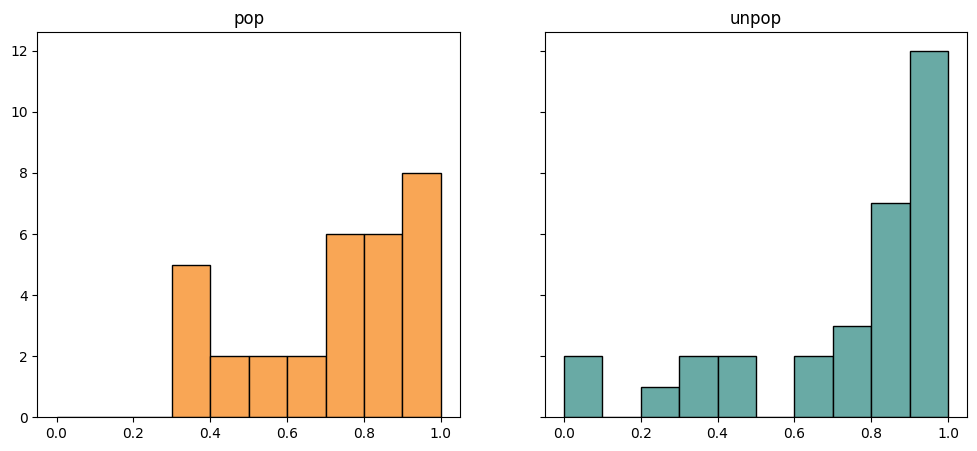

In [37]:
fig, ax = plt.subplots(1,2, sharex=True,sharey=True , figsize=(12,5)) 
bins = 10
plot_range = (0,1)
ax[0].hist(pop_form_ratio,bins=bins,range=plot_range,color = '#F9A655',edgecolor='black')
ax[0].set_title('pop')
ax[1].hist(unpop_form_ratio,bins=bins,range=plot_range, color = '#69AAA5',edgecolor='black')
ax[1].set_title('unpop')
plt.show()

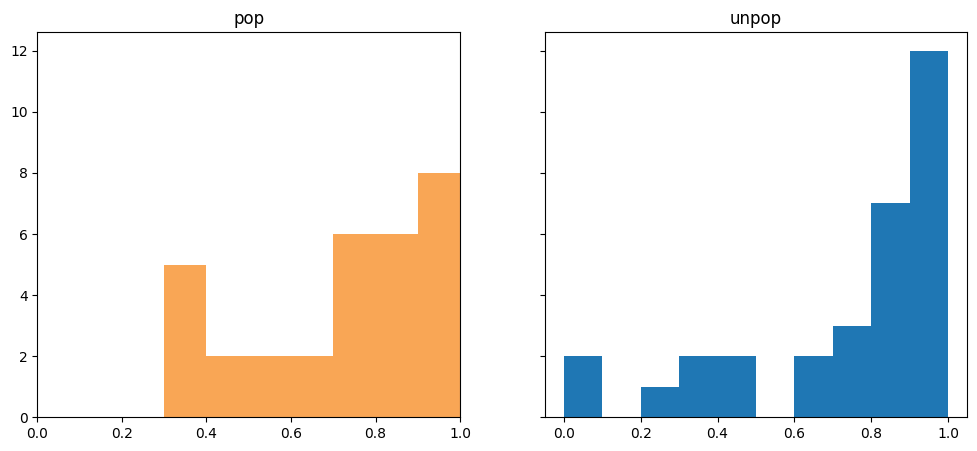

In [13]:
import numpy as np

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 5))
width = 0.1  # 막대의 폭 설정

# pop 그래프
bins_pop = np.arange(0, 1.1, width)
ax[0].bar(bins_pop[:-1], np.histogram(pop_form_ratio, bins_pop)[0], width=width, align='edge',color='#F9A655')
ax[0].set_xlim([0, 1])
ax[0].set_title('pop')

# unpop 그래프
bins_unpop = np.arange(0, 1.1, width)
ax[1].bar(bins_unpop[:-1], np.histogram(unpop_form_ratio, bins_unpop)[0], width=width, align='edge')
# ax[1].set_xlim([0, 1])
ax[1].set_title('unpop')

plt.show()

In [31]:
dl = DataLoad(tran_path='./Data/transcripts.csv', meta_path='./Data/videos.csv')
transcript = dl.load_transcripts()
meta = dl.load_meta()

In [77]:
meta[-meta['duration'].str.contains('S')]['duration']

40    PT31M
Name: duration, dtype: object

In [4]:
def dutosec(duration) :
    duration = duration.split('T')[-1]
    hours, minutes, seconds = 0,0,0

    if 'H' in duration:
        hours = duration.split('H')[0]
        duration = duration.split('H')[1]
        hours = int(hours)

    if 'M' in duration:
        minutes = duration.split('M')[0]
        duration = duration.split('M')[1]
        minutes = int(minutes)

    if 'S' in duration :    
        seconds = int(duration[:-1])

    total_seconds = hours * 3600 + minutes * 60 + seconds

    return total_seconds

In [5]:
meta['duration'] = meta['duration'].apply(lambda x : dutosec(x)) 

In [7]:
meta['duration']

0      428
1     1335
2      726
3      995
4      326
      ... 
77     756
78     453
79     575
80     762
81     523
Name: duration, Length: 82, dtype: int64

In [13]:
pop_processing_df['token'] = pop_processing_df['script'].apply(lambda x : tokenizer.tokenize(x))

In [15]:
pop_processing_df

,id,script,Formal,token
0,2YiZrIJzUsk,예 오수학의 다 합창에 곱을 이용한 인수분해 파트 투입니다,1,"[예, 오, ##수, ##학의, 다, 합, ##창, ##에, 곱, ##을, 이용한,..."
1,2YiZrIJzUsk,자 여러분들께서 아마 시중에 문제집들을 보시면요,1,"[자, 여러분들, ##께서, 아마, 시, ##중에, 문제, ##집, ##들을, 보,..."
2,2YiZrIJzUsk,이인 수분해를 쪽 공부할 거야,0,"[이인, 수, ##분해, ##를, 쪽, 공부, ##할, 거야]"
3,2YiZrIJzUsk,그래서 여러분들이 문제집에서 인수분의 마 풀고 공부했어요,1,"[그래서, 여러분들, ##이, 문제, ##집에서, 인수, ##분의, 마, 풀고, 공..."
4,2YiZrIJzUsk,그리고 나면 뒤쪽에 문제들이 몇 페이지가 나오고 뭐 단원 종합문제라던가 이런 이름이...,1,"[그리고, 나면, 뒤, ##쪽에, 문제, ##들이, 몇, 페, ##이지, ##가, ..."
...,...,...,...,...
4491,yjSgBIT6dbk,이런문제가나오면아은까지는곱한심히줘힘을거다내면은그대로부분을인물뭐이렇게함께하라그래서이것...,0,[[UNK]]
4492,yjSgBIT6dbk,그래도 악마라고 했죠,1,"[그래도, 악마, ##라고, 했, ##죠]"
4493,yjSgBIT6dbk,왜 록맨 양음 그리고 조금 복잡하면 음식을 적용할 수가 요령을 적용할 수가 없게 돼,0,"[왜, 록, ##맨, 양, ##음, 그리고, 조금, 복잡, ##하면, 음식, ##을..."
4494,yjSgBIT6dbk,그래서 꽤 뜯어내는 쉽게 할 수 있고 의무 안되는 난 기회를 항상 이야기란 아시겠죠,1,"[그래서, 꽤, 뜯어, ##내는, 쉽게, 할, 수, 있고, 의무, 안되는, 난, 기..."


In [16]:
meta.head()

,index,kind,etag,id,publishedAt,channelId,title,description,thumbnails,channelTitle,...,dimension,definition,caption,licensedContent,contentRating,projection,viewCount,likeCount,favoriteCount,commentCount
0,12,youtube#video,njwgYRHcP0g8bLG41vURQtUy3Bg,yjSgBIT6dbk,2022-05-23T11:15:03Z,UCufMvGtKg2hoTs0h1Ti5cxg,[분to소 1편]분수를 소수로 5초안에 바꾸는 방법! 절대 외우지 마세요!!,놀면서❤️수학만점~ 인공지능수학 깨봉!\n#분수 #소수 #깨봉수학 #깨봉꿀팁\n[깨...,{'default': {'url': 'https://i.ytimg.com/vi/yj...,인공지능수학 깨봉,...,2d,hd,False,True,{},rectangular,1291691,13797.0,0,572
1,9,youtube#video,qoEKlPDlb3F0y54bqbI4A_ufpPY,UKD3ZmGLPt4,2022-11-04T05:00:21Z,UCIeGcgo2NLHwYV5_NHuOwgg,이걸 보시면 i를 왜 배우는지 알게 됩니다.,1️⃣2️⃣ Math 구독하기 👍 : http://bit.ly/3Pw2NOG\n1...,{'default': {'url': 'https://i.ytimg.com/vi/UK...,12 Math,...,2d,hd,True,True,{},rectangular,508109,8568.0,0,436
2,1,youtube#video,lIcGcVz3xapcY5Ay-WmWSZSJn2o,LAQI9Kjiwkc,2020-02-14T11:03:42Z,UCudGH0bl44LtLfbj-YdTxvA,중3-1수학 [16강] 인수와 인수분해,중3-1수학 [16강] 인수와 인수분해\n\n이 강의는 교재에 구애받지 않는 강의입...,{'default': {'url': 'https://i.ytimg.com/vi/LA...,수학 맛집,...,2d,hd,False,True,{},rectangular,171124,2350.0,0,190
3,42,youtube#video,OaNHNwLe33uezl38tMvhIJ9sTXk,DDZ8vvoQC7g,2020-03-13T06:58:10Z,UCudGH0bl44LtLfbj-YdTxvA,중3-1수학 [21강] 이차방정식과 그 해,더 많은 강의는\nhttps://www.airklass.com/search?q=%E...,{'default': {'url': 'https://i.ytimg.com/vi/DD...,수학 맛집,...,2d,hd,False,True,{},rectangular,132324,1601.0,0,92
4,30,youtube#video,gk8xgiWC12hfbNDvZDdjYcG4RCE,C6OrR8wpxk0,2022-01-08T03:00:04Z,UCkzbCw-4lXOl4Gf-AOrI_gw,인수분해를 빠르게 하려면 2가지만 확인하자!,"#수학 #인수분해 #스킬\n대수론과 대수학에서, 인수분해(因數分解, factoriz...",{'default': {'url': 'https://i.ytimg.com/vi/C6...,Ray 수학,...,2d,hd,True,True,{},rectangular,99184,1985.0,0,246
